# GRIP-The Sparks Foundation
## Data Science and business Analytics
## Task-1 :- Prediction using supervised ML
## Task Goal - To predict percentage of an student based on the no. of study hours

## Aman Kumar Mahto

In [1]:
#importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#reading the data set
data = pd.read_csv('http://bit.ly/w-data')

### Analysing the data set

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info() ##checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.columns #Visualizing the data

Index(['Hours', 'Scores'], dtype='object')

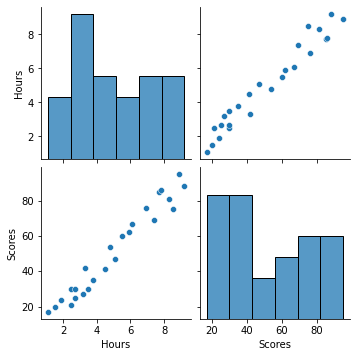

In [7]:
sns.pairplot(data)

<AxesSubplot:>

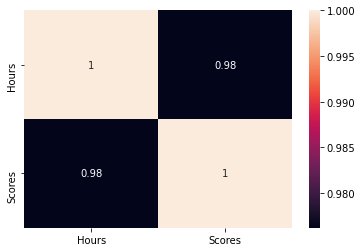

In [8]:
sns.heatmap(data.corr(), annot=True)

In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Training the data

In [10]:
x = np.asanyarray(data['Hours'])
y = np.asanyarray(data['Scores'])

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)


In [12]:
lr = LinearRegression()

In [13]:
lr.fit(np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

LinearRegression()

In [14]:
print('Coefficients: ', lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficients:  [[9.78856669]]
Intercept:  [2.37081538]


In [15]:
#predicting the scores

#Comparing data (Actual vs Predicted)

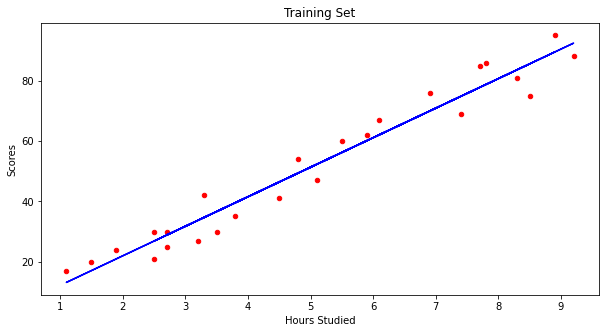

In [16]:
#plotting the traing set
data.plot(kind='scatter', x='Hours', y='Scores', figsize=(10,5), color='red')
plt.plot(x_train, lr.coef_[0]*x_train + lr.intercept_, color='blue')
plt.title('Training Set')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

In [17]:
predict=lr.predict(np.array(x_test).reshape(-1,1))
predict

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [18]:
df = pd.DataFrame(np.c_[x_test,y_test,predict], columns=['Hours', 'Actual Score', 'Predicted Scores'])
df

,Hours,Actual Score,Predicted Scores
0,1.5,20.0,17.053665
1,3.2,27.0,33.694229
2,7.4,69.0,74.806209
3,2.5,30.0,26.842232
4,5.9,62.0,60.123359
5,3.8,35.0,39.567369
6,1.9,24.0,20.969092
7,7.8,86.0,78.721636


In [19]:
#testing with given data

hours= [9.25]
pred=lr.predict([hours])
print("NO. of Hours = {}".format(hours))
print("Predicted scores = {}".format(pred[0]))

NO. of Hours = [9.25]
Predicted scores = [92.91505723]


In [20]:
from sklearn import metrics
print("Mean Absolute error:", metrics.mean_absolute_error(y_test,predict))
print("Mean Squared error:", metrics.mean_squared_error(y_test,predict))

Mean Absolute error: 4.419727808027652
Mean Squared error: 22.96509721270043


# Thank You